# Model selection, data set 3A

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
dataset = pd.read_csv('germany_housing_data_part3A_removed_missing_values.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
dataset.head()

,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,Condition,Heating,Energy_source,State,Garagetype,Type,Price
0,227.00,973.0,10.0,4.0,4.0,2.0,1809.0,2015.0,8.0,modernized,central heating,electricity,Baden-Württemberg,Parking lot,Duplex,364000.0
1,210.00,1460.0,6.0,4.0,2.0,3.0,1939.0,2014.0,2.0,modernized,stove heating,oil,Baden-Württemberg,Garage,Mid-terrace house,1750000.0
2,132.00,314.0,4.5,3.0,1.0,3.0,1987.0,2018.0,2.0,modernized,stove heating,oil,Baden-Württemberg,Garage,Single dwelling,359000.0
3,152.11,2461.0,4.0,3.0,1.0,2.0,2016.0,2016.0,1.0,dilapidated,stove heating,gas,Baden-Württemberg,Garage,Mid-terrace house,585000.0
4,250.00,790.0,7.5,4.0,2.0,3.0,1981.0,2018.0,4.0,modernized,stove heating,oil,Baden-Württemberg,Parking lot,Mid-terrace house,650000.0


## Encoding categorical data

We can see below, that the column numbers 9 - 14 have categorical data and must be one hot encoded

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Living_space    2062 non-null   float64
 1   Lot             2062 non-null   float64
 2   Rooms           2062 non-null   float64
 3   Bedrooms        2062 non-null   float64
 4   Bathrooms       2062 non-null   float64
 5   Floors          2062 non-null   float64
 6   Year_built      2062 non-null   float64
 7   Year_renovated  2062 non-null   float64
 8   Garages         2062 non-null   float64
 9   Condition       2062 non-null   object 
 10  Heating         2062 non-null   object 
 11  Energy_source   2062 non-null   object 
 12  State           2062 non-null   object 
 13  Garagetype      2062 non-null   object 
 14  Type            2062 non-null   object 
 15  Price           2062 non-null   float64
dtypes: float64(10), object(6)
memory usage: 257.9+ KB


### The onehot encoding of the columns

In [4]:
X = pd.get_dummies(X)
X.head(10)

,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,Condition_by arrangement,...,Type_Castle,Type_Corner house,Type_Duplex,Type_Farmhouse,Type_Mid-terrace house,Type_Multiple dwelling,Type_Residential property,Type_Single dwelling,Type_Special property,Type_Villa
0,227.00,973.0,10.0,4.0,4.0,2.0,1809.0,2015.0,8.0,0,...,0,0,1,0,0,0,0,0,0,0
1,210.00,1460.0,6.0,4.0,2.0,3.0,1939.0,2014.0,2.0,0,...,0,0,0,0,1,0,0,0,0,0
2,132.00,314.0,4.5,3.0,1.0,3.0,1987.0,2018.0,2.0,0,...,0,0,0,0,0,0,0,1,0,0
3,152.11,2461.0,4.0,3.0,1.0,2.0,2016.0,2016.0,1.0,0,...,0,0,0,0,1,0,0,0,0,0
4,250.00,790.0,7.5,4.0,2.0,3.0,1981.0,2018.0,4.0,0,...,0,0,0,0,1,0,0,0,0,0
5,190.00,450.0,7.5,6.0,2.0,4.0,1956.0,1988.0,4.0,0,...,0,0,1,0,0,0,0,0,0,0
6,165.00,560.0,6.0,4.0,2.0,3.0,1967.0,2017.0,1.0,0,...,0,0,1,0,0,0,0,0,0,0
7,243.00,1725.0,8.0,5.0,3.0,3.0,1968.0,2018.0,10.0,0,...,0,0,1,0,0,0,0,0,0,0
8,175.00,290.0,5.0,3.0,1.0,4.0,1998.0,2015.0,2.0,0,...,0,0,0,0,0,0,0,1,0,0
9,278.78,616.0,11.0,8.0,3.0,3.0,1997.0,1997.0,5.0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
X = X.values
y = y.values

### The result of each model will be added to this list

In [6]:
results_r2 = []

# Model: XGBoost regression

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the XGBoost regression model 

In [8]:
from xgboost import XGBRegressor
#seed = 0 is default
regressor = XGBRegressor(seed = 0)
regressor.fit(X_train, y_train)

[11:04:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=0)

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1614849.12  519000.  ]
 [ 428874.91  935000.  ]
 [ 443520.78  749000.  ]
 [ 846467.5   475000.  ]
 [  87575.95   89000.  ]
 [ 540524.06   98000.  ]
 [ 722612.38  649000.  ]
 [ 732425.94  800000.  ]
 [ 356155.25  290000.  ]
 [ 544489.5   699000.  ]
 [ 234328.25  280000.  ]
 [ 430467.97  395000.  ]
 [ 385962.84  305000.  ]
 [ 213061.81  240000.  ]
 [ 363746.38  158000.  ]
 [ 378894.06  319000.  ]
 [  91633.86   89000.  ]
 [ 419135.16  298500.  ]
 [ 670701.06  990000.  ]
 [ 681355.44 2280000.  ]
 [ 261829.2   150000.  ]
 [ 810492.88  720000.  ]
 [2688574.   3595000.  ]
 [ 394685.06  335000.  ]
 [ 532321.    449000.  ]
 [ 517192.25  550000.  ]
 [ 259235.11  180000.  ]
 [  53701.38   35000.  ]
 [ 592285.31  995000.  ]
 [ 594783.81  449000.  ]
 [ 457650.56  520000.  ]
 [ 295933.53  725000.  ]
 [ 955341.88  449000.  ]
 [ 834366.5   679000.  ]
 [ 500098.    380000.  ]
 [1203408.   2890000.  ]
 [ 296608.69  320000.  ]
 [ 633013.62  480000.  ]
 [ 136399.39  139000.  ]
 [ 212834.81   69000.  ]


## Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))


0.5018809022036116


# Model: Random forest regression

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the random forest regression model 

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

## Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1753490.    519000.  ]
 [ 469840.    935000.  ]
 [ 417039.48  749000.  ]
 [ 295374.    475000.  ]
 [ 125486.19   89000.  ]
 [ 549818.86   98000.  ]
 [ 744095.    649000.  ]
 [ 576000.21  800000.  ]
 [ 523434.    290000.  ]
 [ 601840.    699000.  ]
 [ 183289.5   280000.  ]
 [ 427114.5   395000.  ]
 [ 376446.    305000.  ]
 [ 194008.99  240000.  ]
 [ 341865.    158000.  ]
 [ 466340.    319000.  ]
 [ 142004.04   89000.  ]
 [ 399692.98  298500.  ]
 [ 743805.    990000.  ]
 [ 728262.55 2280000.  ]
 [ 235145.    150000.  ]
 [1027094.75  720000.  ]
 [2269584.64 3595000.  ]
 [ 338665.    335000.  ]
 [ 832558.53  449000.  ]
 [ 563568.    550000.  ]
 [ 270510.    180000.  ]
 [ 182359.84   35000.  ]
 [ 721629.    995000.  ]
 [ 660127.5   449000.  ]
 [ 526975.    520000.  ]
 [ 317181.59  725000.  ]
 [1253092.    449000.  ]
 [ 595070.    679000.  ]
 [ 462470.66  380000.  ]
 [1541778.55 2890000.  ]
 [ 216113.9   320000.  ]
 [ 577848.5   480000.  ]
 [ 147135.    139000.  ]
 [ 187970.5    69000.  ]


## Evaluating the Model Performance

In [14]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.5059503951112118


# Model: Decision tree regression

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the Decision Tree Regression model 

In [16]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state= 0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [17]:
y_pred = tree.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2399000.    519000.  ]
 [ 550000.    935000.  ]
 [ 219500.    749000.  ]
 [ 135000.    475000.  ]
 [  84000.     89000.  ]
 [ 515000.     98000.  ]
 [ 891000.    649000.  ]
 [ 260000.    800000.  ]
 [ 199000.    290000.  ]
 [ 775000.    699000.  ]
 [ 170000.    280000.  ]
 [ 249000.    395000.  ]
 [ 344000.    305000.  ]
 [ 339000.    240000.  ]
 [ 249000.    158000.  ]
 [ 459900.    319000.  ]
 [  35000.     89000.  ]
 [ 799000.    298500.  ]
 [ 895000.    990000.  ]
 [ 649000.   2280000.  ]
 [ 139000.    150000.  ]
 [1230000.    720000.  ]
 [2900000.   3595000.  ]
 [ 440000.    335000.  ]
 [ 729000.    449000.  ]
 [ 428000.    550000.  ]
 [ 249000.    180000.  ]
 [  35000.     35000.  ]
 [1345000.    995000.  ]
 [ 449000.    449000.  ]
 [ 950000.    520000.  ]
 [  49500.    725000.  ]
 [1670000.    449000.  ]
 [ 375000.    679000.  ]
 [ 479000.    380000.  ]
 [ 769000.   2890000.  ]
 [ 249000.    320000.  ]
 [ 479000.    480000.  ]
 [ 119000.    139000.  ]
 [ 169000.     69000.  ]


## Evaluating the Model Performance

In [18]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.14010805206837806


# Model: Multiple linear regression

## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the Multiple linear regression 

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [21]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.06e+06  5.19e+05]
 [ 4.05e+05  9.35e+05]
 [ 4.74e+05  7.49e+05]
 [ 1.06e+06  4.75e+05]
 [-2.89e+04  8.90e+04]
 [ 6.07e+05  9.80e+04]
 [ 1.23e+06  6.49e+05]
 [ 7.72e+05  8.00e+05]
 [ 1.41e+05  2.90e+05]
 [ 7.43e+05  6.99e+05]
 [ 3.06e+05  2.80e+05]
 [ 8.04e+05  3.95e+05]
 [ 2.93e+05  3.05e+05]
 [ 1.93e+05  2.40e+05]
 [ 2.56e+05  1.58e+05]
 [ 3.79e+05  3.19e+05]
 [ 7.07e+04  8.90e+04]
 [ 2.54e+05  2.98e+05]
 [ 9.24e+05  9.90e+05]
 [ 7.06e+05  2.28e+06]
 [ 4.55e+05  1.50e+05]
 [ 9.01e+05  7.20e+05]
 [ 1.98e+06  3.60e+06]
 [ 4.15e+05  3.35e+05]
 [ 4.57e+05  4.49e+05]
 [ 5.87e+05  5.50e+05]
 [ 1.70e+05  1.80e+05]
 [-1.29e+05  3.50e+04]
 [ 8.97e+05  9.95e+05]
 [ 5.66e+05  4.49e+05]
 [ 4.72e+05  5.20e+05]
 [ 3.98e+05  7.25e+05]
 [ 8.86e+05  4.49e+05]
 [ 1.25e+06  6.79e+05]
 [ 5.35e+05  3.80e+05]
 [ 2.17e+06  2.89e+06]
 [ 1.33e+05  3.20e+05]
 [ 5.10e+05  4.80e+05]
 [-2.98e+04  1.39e+05]
 [ 3.15e+05  6.90e+04]
 [ 5.92e+05  4.90e+05]
 [-1.23e+05  5.20e+04]
 [ 9.49e+05  4.95e+05]
 [ 5.46e+05

## Evaluating the Model Performance

In [22]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.4471439553111195


# Model: Polynomial regression

## Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

## Training the Polynomial Regression model

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree= 2)
X_poly_train = poly_reg.fit_transform(X_train)

linear_poly = LinearRegression()
linear_poly.fit(X_poly_train,y_train)

LinearRegression()

## Predicting the Test set results

In [25]:
#X_poly_test = poly_reg.fit_transform(X_test)
X_poly_test = poly_reg.transform(X_test)
y_pred = linear_poly.predict(X_poly_test)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 2.35e+07  5.19e+05]
 [ 5.58e+05  9.35e+05]
 [ 3.10e+05  7.49e+05]
 [-8.05e+06  4.75e+05]
 [ 6.26e+06  8.90e+04]
 [-1.67e+04  9.80e+04]
 [ 8.14e+06  6.49e+05]
 [ 2.04e+05  8.00e+05]
 [ 4.89e+05  2.90e+05]
 [-2.35e+06  6.99e+05]
 [ 5.61e+05  2.80e+05]
 [ 1.01e+06  3.95e+05]
 [ 1.36e+05  3.05e+05]
 [-7.22e+06  2.40e+05]
 [ 2.73e+05  1.58e+05]
 [ 4.95e+05  3.19e+05]
 [ 2.03e+06  8.90e+04]
 [ 2.68e+05  2.98e+05]
 [ 8.55e+05  9.90e+05]
 [ 4.95e+05  2.28e+06]
 [ 6.31e+06  1.50e+05]
 [ 1.05e+06  7.20e+05]
 [ 4.02e+06  3.60e+06]
 [ 3.03e+05  3.35e+05]
 [ 5.35e+05  4.49e+05]
 [ 2.70e+05  5.50e+05]
 [ 4.21e+05  1.80e+05]
 [ 3.50e+04  3.50e+04]
 [ 2.89e+06  9.95e+05]
 [ 4.49e+05  4.49e+05]
 [ 3.51e+05  5.20e+05]
 [ 1.92e+05  7.25e+05]
 [ 8.51e+06  4.49e+05]
 [ 8.32e+04  6.79e+05]
 [ 5.80e+05  3.80e+05]
 [ 6.24e+06  2.89e+06]
 [ 1.76e+06  3.20e+05]
 [ 3.09e+06  4.80e+05]
 [ 1.33e+05  1.39e+05]
 [-1.93e+06  6.90e+04]
 [ 1.40e+06  4.90e+05]
 [ 1.95e+07  5.20e+04]
 [ 6.26e+05  4.95e+05]
 [ 7.06e+05

## Evaluating the Model Performance

In [26]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))


-124.76640255869948


# Model: Support vector regression

In [27]:
y = y.reshape(-1,1)

## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR regression model 

In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X_train, y_train)

SVR()

## Predicting the Test set results

In [31]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 540897.15  519000.  ]
 [ 385861.19  935000.  ]
 [ 235898.41  749000.  ]
 [ 660811.8   475000.  ]
 [ 392857.53   89000.  ]
 [ 453161.23   98000.  ]
 [ 727143.71  649000.  ]
 [ 502101.55  800000.  ]
 [ 328211.87  290000.  ]
 [ 561480.68  699000.  ]
 [ 174181.51  280000.  ]
 [ 544743.1   395000.  ]
 [ 383408.91  305000.  ]
 [ 290579.96  240000.  ]
 [ 413882.06  158000.  ]
 [ 414730.75  319000.  ]
 [ 269767.03   89000.  ]
 [ 370169.65  298500.  ]
 [ 796361.05  990000.  ]
 [ 590837.07 2280000.  ]
 [ 256118.47  150000.  ]
 [ 535929.31  720000.  ]
 [1505681.15 3595000.  ]
 [ 411592.95  335000.  ]
 [ 535933.52  449000.  ]
 [ 474607.5   550000.  ]
 [ 242975.    180000.  ]
 [  88035.63   35000.  ]
 [ 827603.26  995000.  ]
 [ 502141.15  449000.  ]
 [ 391324.44  520000.  ]
 [ 120035.35  725000.  ]
 [ 638286.5   449000.  ]
 [ 967269.38  679000.  ]
 [ 455094.96  380000.  ]
 [ 653103.   2890000.  ]
 [ 223087.46  320000.  ]
 [ 468338.56  480000.  ]
 [  61317.08  139000.  ]
 [ 316487.86   69000.  ]


## Evaluating the Model Performance

In [32]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.37398766120762006


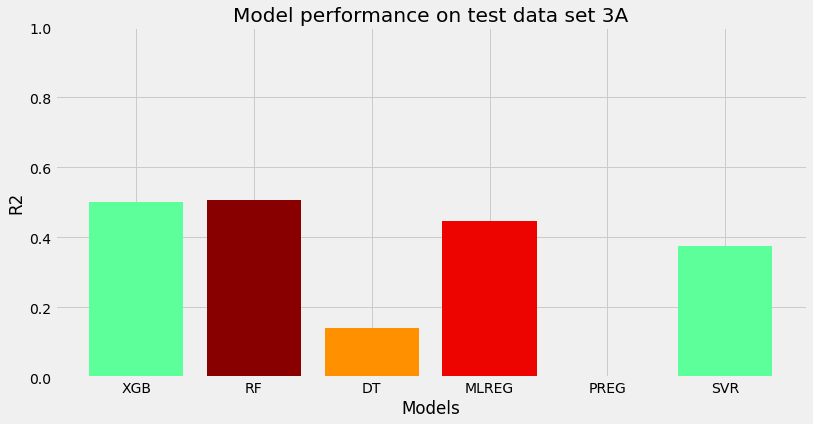

In [33]:
import matplotlib.cm as cm
from numpy.random import rand

# get a color map
cmap = cm.get_cmap('jet')
# 5 nbrs 0 - 1 in array
my_colors = rand(5)

plt.style.use('fivethirtyeight')
plt.figure(figsize =(12,6))

models = np.array(["XGB", "RF", "DT", "MLREG", "PREG","SVR"])

plt.bar(models, results_r2, color = cmap(my_colors))
plt.xlabel("Models")
plt.ylabel("R2")
plt.title("Model performance on test data set 3A")
plt.ylim(0.0, 1)
plt.show()